## Regression

Regression is a supervised learning technique. There are three types of regression:
- Linear regression, used to predict a continuous value, such as a house price, based on an input variable, such as square footage.
- Poisson's regression, used to predict a count, such as the number of times a person will visit a website, based on an input variable, such as the number of times a person has visited the website.
- Logistic regression, used to predict a class, typically binary value, such as whether a person has a disease, based on an input variable, such as age.

## Linear Regression

We will use  linear regression to introduce some machine learning concepts. We will build a model. A model is a mathematical function that takes one or more inputs and produces one or more output, in an effort to simulate a real-world process.

In this case, we will use a model to predict the price of a house based on its size. We will use the following data set to train our model:



In [1]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1vRROuw35vLbbXjBMhNPn3y_gc-Ybbz9g"
data = pd.read_csv(url)
data.drop('House', axis=1, inplace=True)
data

,Taxes,Bedrooms,Baths,Quadrant,NW,price,size,lot
0,1360,3,2.0,NW,1,145000,1240,18000
1,1050,1,1.0,NW,1,68000,370,25000
2,1010,3,1.5,NW,1,115000,1130,25000
3,830,3,2.0,SW,0,69000,1120,17000
4,2150,3,2.0,NW,1,163000,1710,14000
...,...,...,...,...,...,...,...,...
95,990,2,2.0,NW,1,176000,1060,27500
96,3030,3,2.0,SW,0,196500,1730,47400
97,1580,3,2.0,NW,1,132200,1370,18000
98,1770,3,2.0,NE,0,88400,1560,12000


In [2]:
data.describe()

,Taxes,Bedrooms,Baths,NW,price,size,lot
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1668.200000,2.990000,1.890000,0.750000,126698.000000,1526.300000,19417.000000
std,1009.280552,0.658971,0.515321,0.435194,56356.774718,557.116775,8524.309327
min,20.000000,1.000000,1.000000,0.000000,21000.000000,370.000000,3500.000000
25%,970.000000,3.000000,1.875000,0.750000,86875.000000,1157.500000,12875.000000
50%,1535.000000,3.000000,2.000000,1.000000,123750.000000,1410.000000,18000.000000
75%,2042.500000,3.000000,2.000000,1.000000,153075.000000,1760.000000,25000.000000
max,4900.000000,5.000000,3.000000,1.000000,338000.000000,4050.000000,47400.000000


C:\Users\tony.benbrahim\AppData\Local\Temp\ipykernel_28564\397398489.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="YlGnBu")


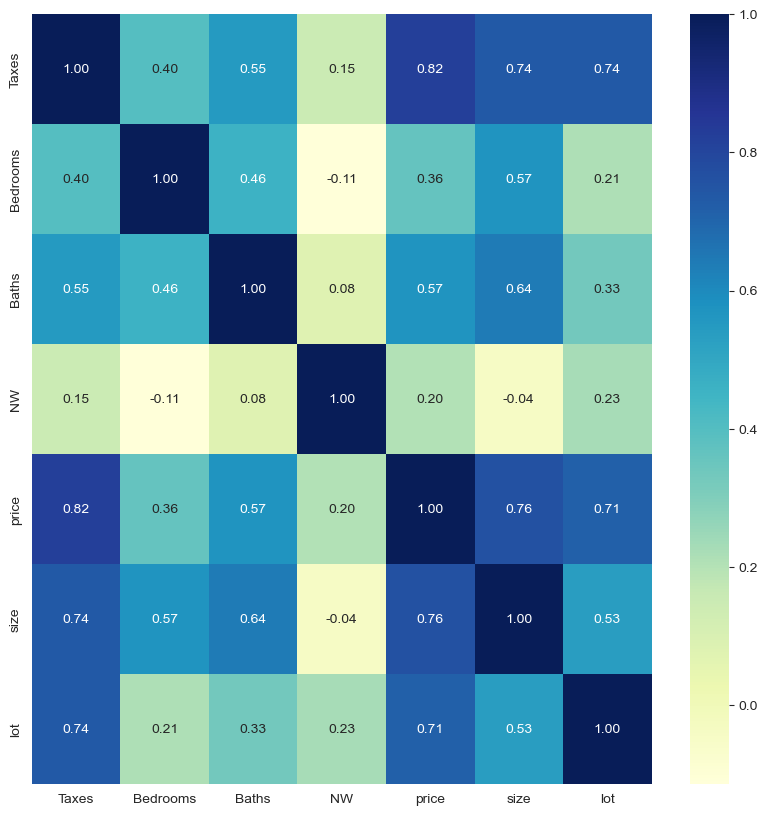

In [3]:
# show data correlation chart with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="YlGnBu")
plt.show()



<Axes: title={'center': 'Price vs Size'}, xlabel='Size (sq ft)', ylabel='Price ($)'>

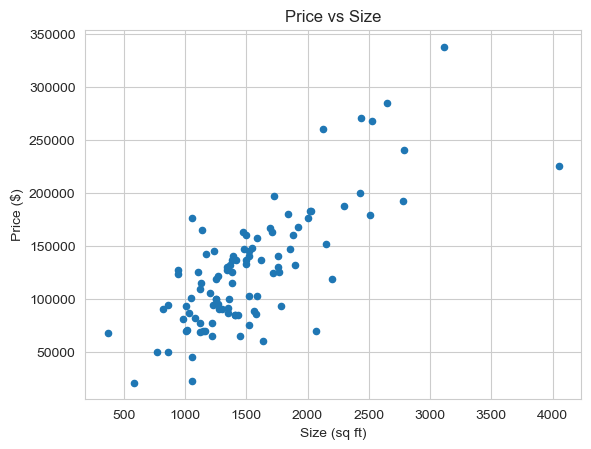

In [4]:
def plot_points():
    plot = data.plot.scatter(x='size', y='price')
    plot.set_title('Price vs Size')
    plot.set_xlabel('Size (sq ft)')
    plot.set_ylabel('Price ($)')
    return plot


plot_points()

## Linear Regression

We can draw the line that best fits the data. The line is called a **regression line**.  There is a formula to determine the line. The formula is called the **least squares method**.


$m = \frac{N \sum(xy) - \sum(x) \sum(y)}{N \sum(x^2) - (\sum(x))^2}$

$b = \frac{\sum(y) - m \sum(x)}{N}$

The formulas are provided for information only and works for a model with 1 input and 1 output. This will not generalize to a model with multiple inputs and outputs, so we will not use the formulas in the future. Rather, we will develop a method to determine the line that best fits the data and will later generalize to multiple inputs and outputs.



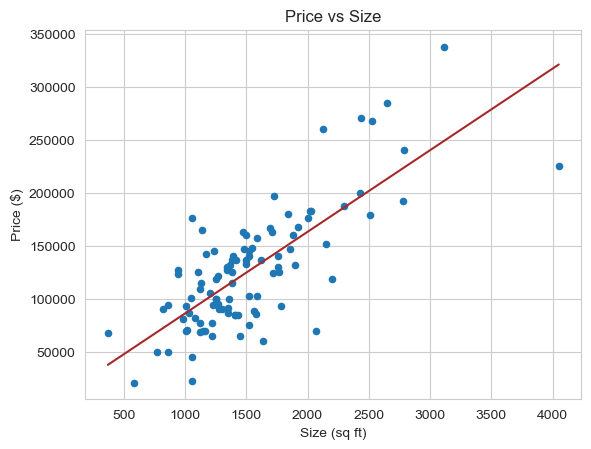

In [5]:
import numpy as np

plot = plot_points()

plot.plot(np.unique(data['size']), np.poly1d(np.polyfit(data['size'], data['price'], 1))(np.unique(data['size'])),
          color='brown')


In [7]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
prices = data.iloc[:, 5].values.reshape(-1, 1)
sizes = data.iloc[:, 6].values.reshape(-1, 1)
linear_regressor.fit(sizes, prices)
y_hat = linear_regressor.predict(np.array([2500]).reshape(-1, 1))
print('Predicted 2500 sq ft house price: $%.2f' % y_hat)
y2_hat = linear_regressor.predict(np.array([3500]).reshape(-1, 1))
print('Predicted 3500 sq ft house price: $%.2f' % y2_hat)

print('Slope: %.2f' % linear_regressor.coef_)
print('Intercept: %.2f' % linear_regressor.intercept_)


Predicted 2500 sq ft house price: $201680.39
Predicted 3500 sq ft house price: $278688.08
Slope: 77.01
Intercept: 9161.16


## Devising a model without a formula

How can we tell which line is the best, or the most accurate, to model the sample data, without eyeballing the data.

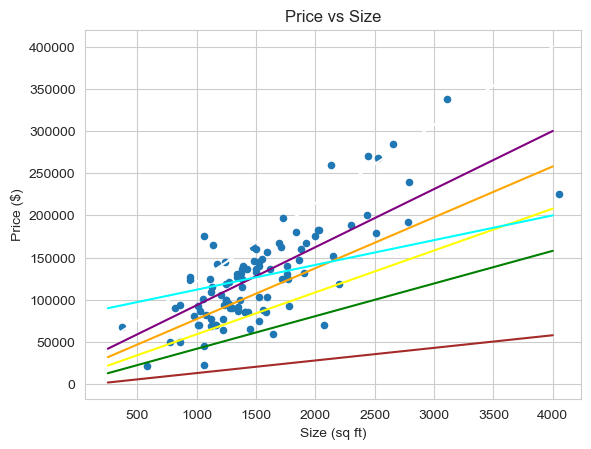

In [8]:
plot = plot_points()

plot.plot([250, 4000], [2000, 58000], color='brown')
plot.plot([250, 4000], [13000, 158000], color='green')
plot.plot([250, 4000], [22000, 208000], color='yellow')
plot.plot([250, 4000], [32000, 258000], color='orange')
plot.plot([250, 4000], [42000, 300000], color='purple')
plot.plot([250, 4000], [52000, 400000], color='white')
plot.plot([250, 4000], [90000, 200000], color='cyan')



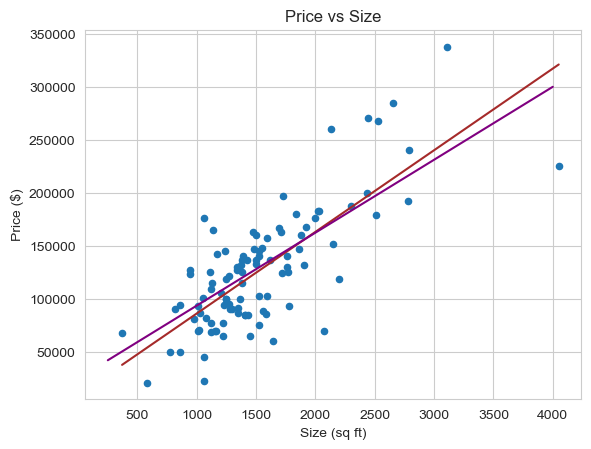

In [9]:
plot = plot_points()

plot.plot(np.unique(data['size']), np.poly1d(np.polyfit(data['size'], data['price'], 1))(np.unique(data['size'])),
          color='brown')
plot.plot([250, 4000], [42000, 300000], color='purple')

[]

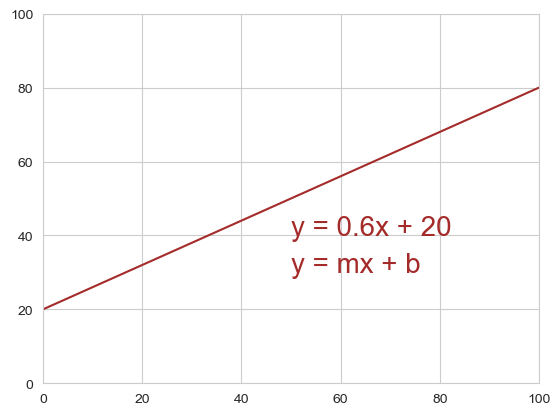

In [10]:
import matplotlib.pyplot as plt

x1, y1 = [0, 100], [20, 80]
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(x1, y1, color='brown')
plt.text(50, 40, 'y = 0.6x + 20', fontsize=20, color='brown')
plt.text(50, 30, 'y = mx + b', fontsize=20, color='brown')
plt.plot()

You can think of this as a function $f(x) = y$. $f$ predicts price $y$ given input square footage $x$. The function is a line, and the line is defined by the slope $m$ and the y-intercept $b$.

In machine learning terms, we rename the variables as follows:
- $x$ is the input variable (independent variable). In neural networks and other classification applications, we call this a **feature**. Square footage is a feature.
- $y$ is the output variable (dependent variable). In neural networks and other classification applications, we call this a **class** or a **label**. Price is a label. In a regression setting, we call the output variable a **target** or **response** or **prediction**, and label it $\hat{y}$.
- $m$ is the slope of the line. In machine learning, we call this the **weight**, and number it, such as $w_1$.
- $b$ is the y-intercept of the line. In machine learning, we call this the **bias**, and number it, such as $b_1$.

The formula of the line becomes:

$\hat{y} = w_1 x_1 + b_1$

This formula will be seen again when we calculate the output of a neuron in a neural network.
For example, here is the intermediate output of a neuron with 3 inputs and 3 weights:
$\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b_1$

The number of **parameters** in a model is the number of weights and biases. In the example above, the number of parameters is 4. In our linear regression model which we seek to build to predict house prices based on square footage, the number of parameters is 2. By comparison,  Chat-GPT 3 has 175 billion parameters, and Chat-GPT 4 is rumored to have 1 trillion parameters.While we will not be working with a model this large, we will see a model to read handwritten digits (MNIST dataset) with over 1.3 million parameters.


## Accurately Measuring Error

We can measure the accuracy of the line by calculating the **mean squared error**. The mean squared error is the average of the squared differences between the predicted values and the actual values. The lower the mean squared error, the better the model.

The formula for the mean squared error is:
$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$

In machine learning, we use the term **loss** instead of error. The square of the difference is called the **L2 loss** in a machine learning context. There are many types of **loss functions** that could be used, especially for classification problems with more parameters.

### MSE Example

![MSE exercise](https://drive.google.com/uc?export=download&id=1yONeIwuKdqJrCobhkXqnDSoXdTrQ_vtA)

In the above chart:
- the loss for the point at $(1,2)$ is $0.6$
- the loss for the point at $(2,1)$ is $-0.8$
- the loss for the point at $(4.3)$ is $0.25$

The MSE is:

$\frac{1}{3} \times (0.6^2 + -0.8^2 + 0.25^2) = 0.354$

Plotting a bunch of random lines and calculating the mean squared error and selecting the lowest error will not converge to the best line, since there are an infinite number of lines that can be drawn. We need to use an **optimization algorithm** to find the best line. The optimization algorithm will start with a random line, and then iteratively improve the line by moving it in the direction of the steepest **descent**. The steepest descent is the direction of the greatest decrease in the loss function. The optimization algorithm will continue to move the line in the direction of the steepest descent until the loss function is minimized. We need a method that **converges** on the correct solution.


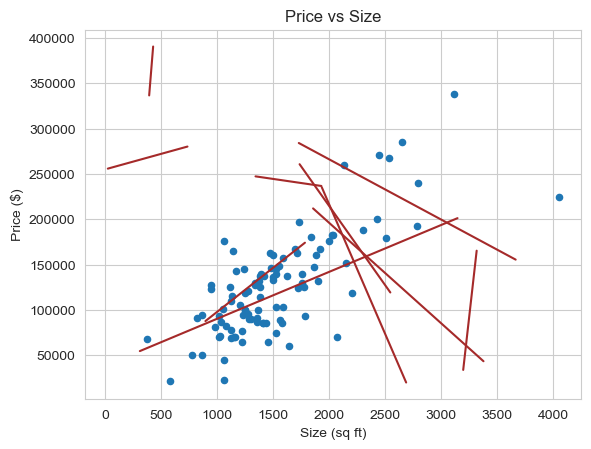

In [11]:
import random

plot = data.plot.scatter(x='size', y='price')
plot.set_title('Price vs Size')
plot.set_xlabel('Size (sq ft)')
plot.set_ylabel('Price ($)')
for i in range(10):
    plot.plot([random.uniform(0, 4000), random.uniform(0, 4000)],
              [random.uniform(0, 400000), random.uniform(0, 400000)], color='brown')

Mean squared error at m=0.000000: 19196708400.00


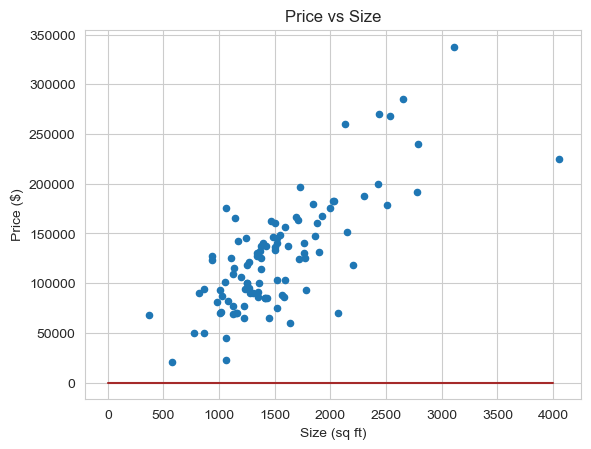

In [31]:
from sklearn.metrics import mean_squared_error

plot = plot_points()

b = 10
m = 0
plot.plot([0, 4000], [m * 0 + b, m * 4000 + b], color='brown')
y = data['price'].values
y_hat = m * data['size'].values + b
loss = mean_squared_error(y, y_hat)
print('Mean squared error at m=%f: %.2f' % (m, loss))

Mean squared error at m=    0: 19196708400.00
Mean squared error at m=    5: 17092212875.00
Mean squared error at m=   10: 15119560700.00
Mean squared error at m=   15: 13278751875.00
Mean squared error at m=   20: 11569786400.00
Mean squared error at m=   25: 9992664275.00
Mean squared error at m=   30: 8547385500.00
Mean squared error at m=   35: 7233950075.00
Mean squared error at m=   40: 6052358000.00
Mean squared error at m=   45: 5002609275.00
Mean squared error at m=   50: 4084703900.00
Mean squared error at m=   55: 3298641875.00
Mean squared error at m=   60: 2644423200.00
Mean squared error at m=   65: 2122047875.00
Mean squared error at m=   70: 1731515900.00
Mean squared error at m=   75: 1472827275.00
Mean squared error at m=   80: 1345982000.00
Mean squared error at m=   85: 1350980075.00
Mean squared error at m=   90: 1487821500.00
Mean squared error at m=   95: 1756506275.00
Mean squared error at m=  100: 2157034400.00
Mean squared error at m=  105: 2689405875.00
Mean 

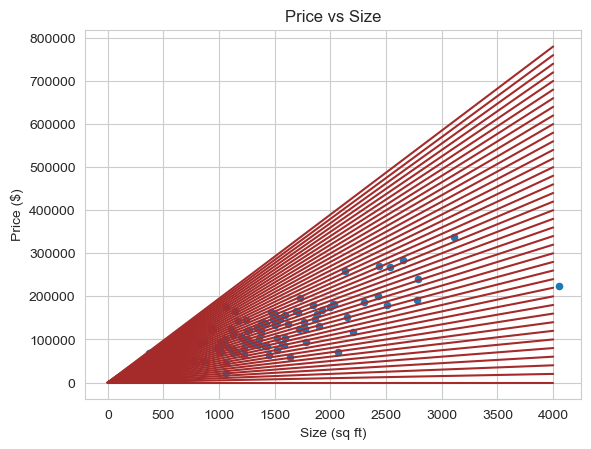

In [13]:
plot = plot_points()

b = 0
for m in range(0, 200, 5):
    plot.plot([0, 4000], [m * 0 + b, m * 4000 + b], color='brown')
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    print('Mean squared error at m=%5.0f: %.2f' % (m, loss))

Min loss: 1332160028.00 is at slope 82.00


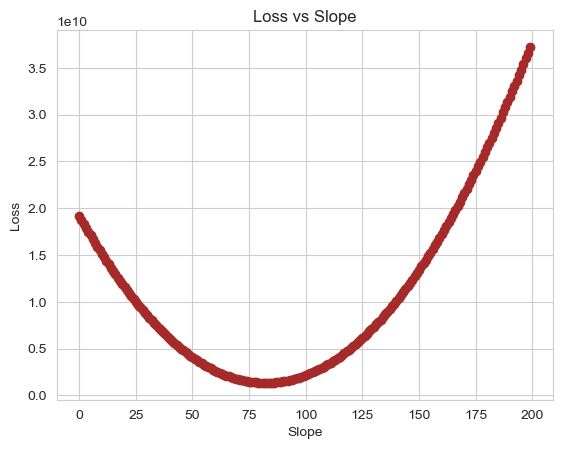

In [14]:
import sys

b = 0
min_slope = 0
min_loss = sys.float_info.max
for m in range(0, 200, 1):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    if loss < min_loss:
        min_loss = loss
        min_slope = m
    plt.plot(m, loss, 'o', color='brown')
    plt.title('Loss vs Slope')
    plt.xlabel('Slope')
    plt.ylabel('Loss')
print('Min loss: %.2f is at slope %.2f' % (min_loss, min_slope))

Min loss: 1329994428.00 is at intercept 0.00


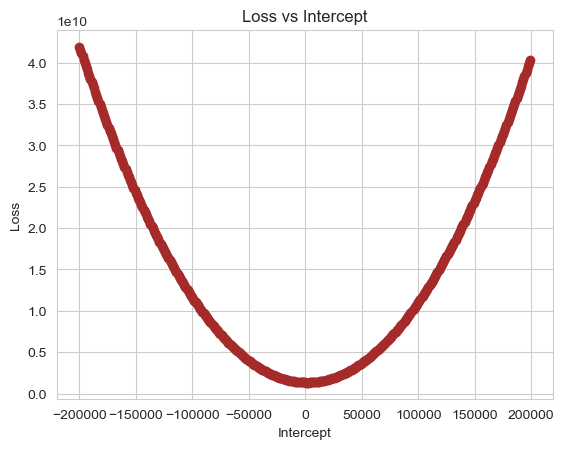

In [15]:
m = 82
min_b = 0
min_loss = sys.float_info.max
for b in range(-200000, 200000, 1000):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    if loss < min_loss:
        min_loss = loss
        min_slope = m
    plt.plot(b, loss, 'o', color='brown')
    plt.title('Loss vs Intercept')
    plt.xlabel('Intercept')
    plt.ylabel('Loss')
print('Min loss: %.2f is at intercept %.2f' % (min_loss, min_b))

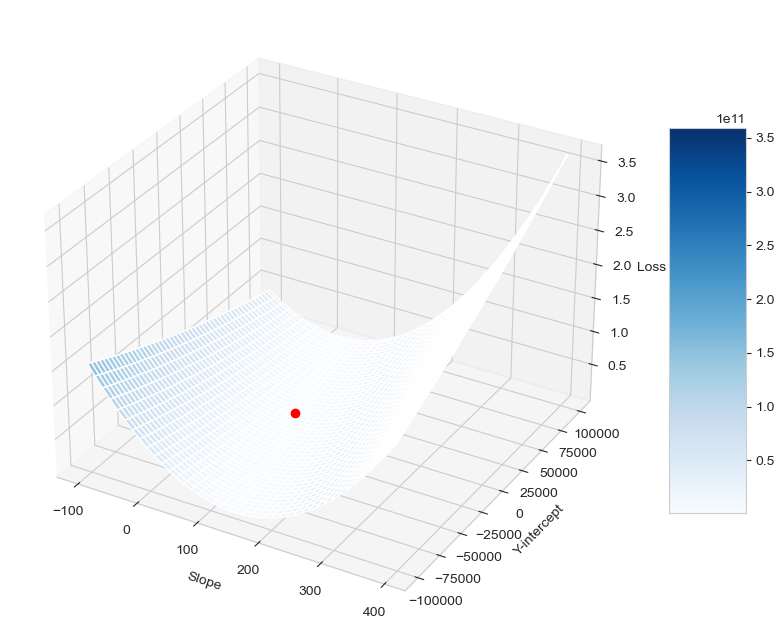

In [16]:
def error(m, b):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    return mean_squared_error(y, y_hat)


m = np.arange(-100, 400, 4)
b = np.arange(-100000, 100000, 1000)

M, B = np.meshgrid(m, b)
E = np.vectorize(error)(M, B)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.set_xlabel('Slope')
ax.set_ylabel('Y-intercept')
ax.set_zlabel('Loss')
ax.view_init(30, -60)
fig.colorbar(surface, shrink=0.5, aspect=5)
ax.plot3D([77], [9161], [min_loss], 'o', color='red')


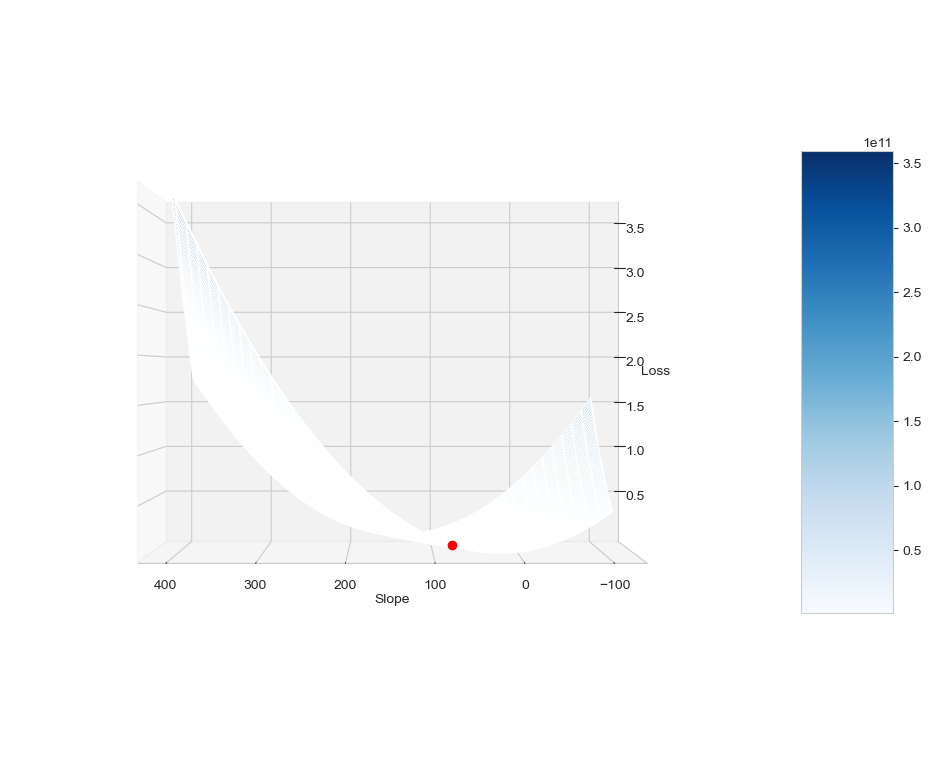

In [17]:
fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.set_xlabel('Slope')
ax.get_yaxis().set_ticks([])
ax.set_zlabel('Loss')
ax.plot3D([77], [9161], [min_loss], 'o', color='red')
ax.view_init(0, 90)  # slope vs loss
fig.colorbar(surface, shrink=0.5, aspect=5)

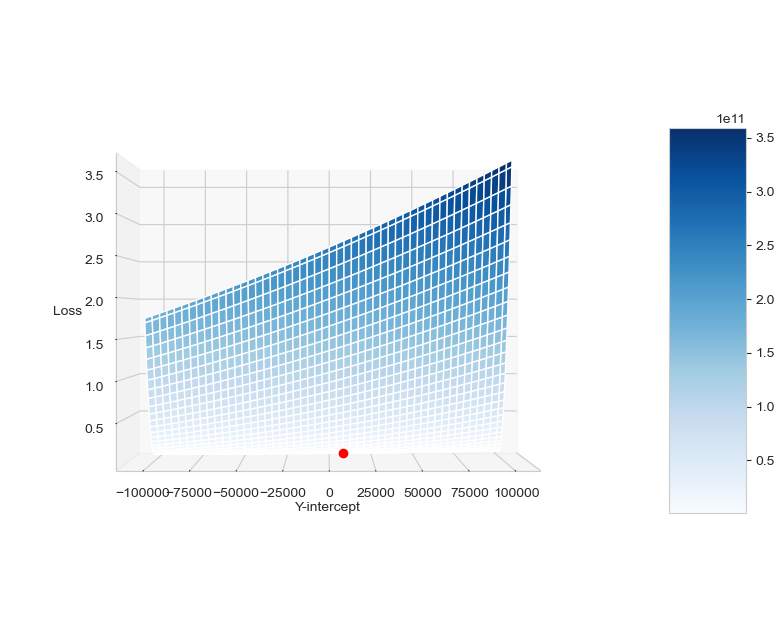

In [18]:

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.get_xaxis().set_ticks([])
ax.set_ylabel('Y-intercept')
ax.set_zlabel('Loss')
ax.plot3D([77], [8161], [min_loss], 'o', color='red')
ax.view_init(0, 0)  # y-intercept vs loss
fig.colorbar(surface, shrink=0.5, aspect=5)

## A complex loss landscape

https://www.cs.umd.edu/~tomg/projects/landscapes/

![loss landscape](https://drive.google.com/uc?export=download&id=1KKaEu373BSfpWLNwK2OQ7THMkioTB8nD)

## A perceptron
![perceptron](https://drive.google.com/uc?export=download&id=12U9ijDgxr5pHk_XaldPZDx7FcTkRXeiE)


Ignoring the **activation function** $\sigma$ for the moment, the output at $y$ is $x_1 \times w_1 + x_2 \times w_2 + ... +x_n \times w_n$, more concisely expressed as $b+\sum_{i=1}^n X_i \times W_i$.

## A perceptron with a single input

![single input perceptron](https://drive.google.com/uc?export=download&id=1cguepnQPg_aW7Ob7_EGpvcFT0D9qkqYL)

Again ignoring the activation function, $y = w_1 \times x_1 + b $.

## Working with arrays


In [60]:
a = np.array([1, 2, 3, 4, 5])
print(f'Array: {a}')
print(f'Array shape: {a.shape}')
print(f'Array type: {a.dtype}')

Array: [1 2 3 4 5]
Array shape: (5,)
Array type: int32
Array: [1. 2. 3. 4. 5.]
Array shape: (5,)
Array type: float32


In [83]:
a = np.array([1, 2, 3, 4, 5], dtype=np.float32)
print(f'Array: {a}')
print(f'Array shape: {a.shape}')
print(f'Array type: {a.dtype}')
print(f'Mean: {a.mean()}')
print(f'Sum: {a.sum()}')
print(f'a *2.5 = {a * 2.5}')
b = np.array([0.1, 0.2, 0.3, 0.4, 0.5], dtype=np.float32)
print(f'b = {b}')
print(f'a + b = {a + b}')
print(f'a * b = {a * b}')
print(f'dot product = {np.dot(a,b)}')

Array: [1. 2. 3. 4. 5.]
Array shape: (5,)
Array type: float32
Mean: 3.0
Sum: 15.0
a *2.5 = [ 2.5  5.   7.5 10.  12.5]
b = [0.1 0.2 0.3 0.4 0.5]
a + b = [1.1 2.2 3.3 4.4 5.5]
a * b = [0.1        0.4        0.90000004 1.6        2.5       ]
dot product = 5.5


![perceptron](https://drive.google.com/uc?export=download&id=12U9ijDgxr5pHk_XaldPZDx7FcTkRXeiE)

Weights:
$\vec{w}= [w_1, w_2, ..., w_n]$

Inputs:
$\vec{x}= [x_1, x_2, ..., x_n]$

$b$ is the bias

$\vec{w} \cdot \vec{x} + b = \sum_{i=1}^n w_i \times x_i + b$

## Working with Tensors

In [92]:
import torch

a = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32, requires_grad=True)
print(f'Tensor a: {a}')
b=torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5], dtype=torch.float32, requires_grad=True)
print(f'Tensor b: {b}')
c=torch.dot(a, b)
print(f'torch.dot(a, b) = {c}')


Tensor a: tensor([1., 2., 3., 4., 5.], requires_grad=True)
Tensor b: tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000], requires_grad=True)
torch.dot(a, b) = 5.5


In [130]:
x = torch.tensor(8.0, requires_grad = True)
print("x:", x)

x: tensor(8., requires_grad=True)


In [131]:
y = x**2 + 10
print("y:", y)

y: tensor(74., grad_fn=<AddBackward0>)


In [132]:
y.backward()
dx = x.grad
print("x.grad :", dx)


x.grad : tensor(16.)


$\frac{dy}{dx} = \frac{d (x^2 + 10 )}{dx} = 2x$

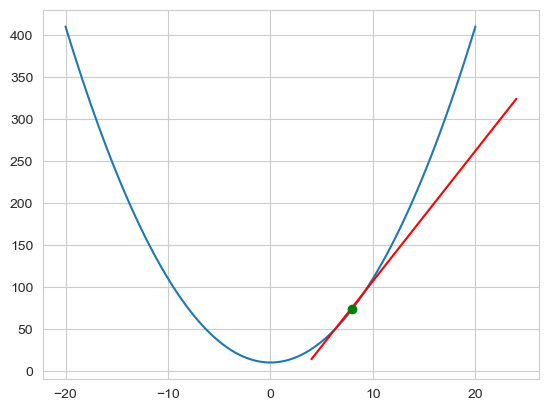

In [141]:
x = np.linspace(-20, 20, 100)
y = np.array([j*j+10 for j in x])
plt.plot(x, y)
plt.plot([4,24], [14,324], color='red')
plt.plot(8, 74, 'o', color='green')


![NMIST number classification](https://drive.google.com/uc?export=download&id=18JJIPdTch6hozeaG2v-KB7Uy61y9Gioo)


## Creating a model with PyTorch

1. Prepare the data
2. Define the model
3. Define the loss function
4. Define the optimizer
5. Train the model (loop):
    1. Make a prediction
    2. Calculate the loss
    3. Calculate the gradients
    4. Update the weights
6. Evaluate the model


In [19]:
import torch

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print("Running on {}".format(dev))

Running on cuda:0


In [55]:
from torch.autograd import Variable
import torch.nn as nn

# x_train, x_test, y_train, y_test = train_test_split(data['size'].values.astype(np.float32),
#                                                     data['price'].values.astype(np.float32),
#                                                     test_size=0.8,
#                                                     random_state=42)

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear = nn.Linear(1, 1)
        # nn.init.normal_(self.linear.weight, mean=10, std=1.0)
        # nn.init.normal_(self.linear.bias, mean=1000, std=1.0)

    def forward(self, x):
        return self.linear(x)


model = LR()
if torch.cuda.is_available():
    model.cuda()

torch.nn.init.normal_(model.linear.weight)

epochs = 801
loss_function = torch.nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

print('start: weight {} bias {}'.format(model.linear.weight.item(), model.linear.bias.item()))

for epoch in range(epochs):
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {} weight {} bias {}'.format(epoch, loss.item(), model.linear.weight.item(),
                                                           model.linear.bias.item()))

print(f'm = {model.linear.weight.item()}')
print(f'b = {1000. * model.linear.bias.item()}')


start: weight -1.1558537483215332 bias 0.8568060398101807
epoch 0, loss 19482.56640625 weight 42.60050582885742 bias 26.377880096435547
epoch 50, loss 1338.58154296875 weight 70.04922485351562 bias 20.788166046142578
epoch 100, loss 1324.99658203125 weight 74.10135650634766 bias 14.017403602600098
epoch 150, loss 1322.6265869140625 weight 75.79380798339844 bias 11.18946361541748
epoch 200, loss 1322.2132568359375 weight 76.50069427490234 bias 10.008316040039062
epoch 250, loss 1322.140869140625 weight 76.79592895507812 bias 9.514995574951172
epoch 300, loss 1322.12841796875 weight 76.91924285888672 bias 9.308948516845703
epoch 350, loss 1322.126220703125 weight 76.97074890136719 bias 9.222882270812988
epoch 400, loss 1322.1258544921875 weight 76.99226379394531 bias 9.186944961547852
epoch 450, loss 1322.1258544921875 weight 77.0012435913086 bias 9.171934127807617
epoch 500, loss 1322.125732421875 weight 77.00499725341797 bias 9.16566276550293
epoch 550, loss 1322.125732421875 weight 77